In [2]:
# dataframe and plotting
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# machine learning
#from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

plt.rcParams["axes.labelsize"] = 18
#from google.colab import files
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [4]:
# Load files into a pandas dataframe
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')
ss = pd.read_csv('SampleSubmission.csv')
variables = pd.read_csv('VariableDefinitions.csv')

In [5]:
# Let’s observe the shape of our datasets.
print('train data shape :', train.shape)
print('test data shape :', test.shape)

train data shape : (23524, 13)
test data shape : (10086, 12)


In [6]:
#show list of columns in train_data
list(train.columns)

['country',
 'year',
 'uniqueid',
 'bank_account',
 'location_type',
 'cellphone_access',
 'household_size',
 'age_of_respondent',
 'gender_of_respondent',
 'relationship_with_head',
 'marital_status',
 'education_level',
 'job_type']

In [7]:
train.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [8]:
#checking for missing values
print('missing values', train.isnull().sum())

missing values country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64


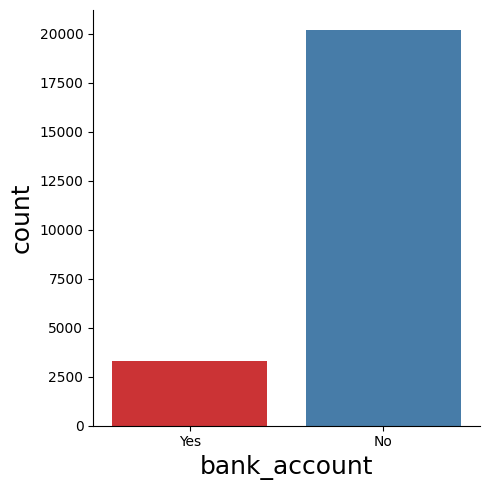

In [9]:
#explore target distribution
sns.catplot(x="bank_account", kind="count", data=train, palette="Set1")
plt.tight_layout()

In [10]:
ss.head()

,unique_id,bank_account
0,uniqueid_1 x Kenya,0
1,uniqueid_2 x Kenya,0
2,uniqueid_3 x Kenya,0
3,uniqueid_4 x Kenya,0
4,uniqueid_5 x Kenya,0


In [11]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB
None


In [12]:
variables.T

,0,1,2,3,4,5,6,7,8,9,10,11
Variable Definitions,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
Unnamed: 1,Country interviewee is in.,Year survey was done in.,Unique identifier for each interviewee,"Type of location: Rural, Urban","If interviewee has access to a cellphone: Yes, No",Number of people living in one house,The age of the interviewee,"Gender of interviewee: Male, Female",The interviewee’s relationship with the head o...,The martial status of the interviewee: Married...,Highest level of education: No formal educatio...,Type of job interviewee has: Farming and Fishi...


In [13]:
train['bank_account'].value_counts()

bank_account
No     20212
Yes     3312
Name: count, dtype: int64

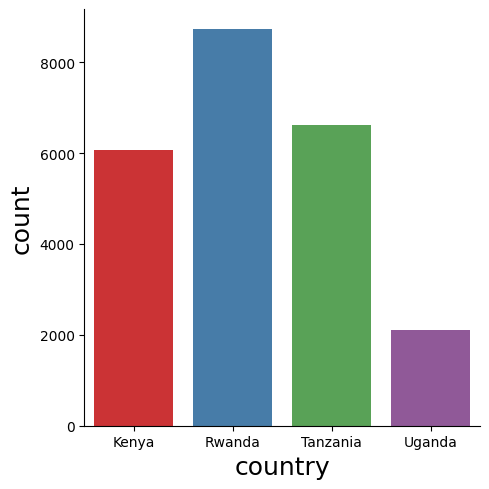

In [14]:
sns.catplot(x="country", kind="count", data=train, palette="Set1")


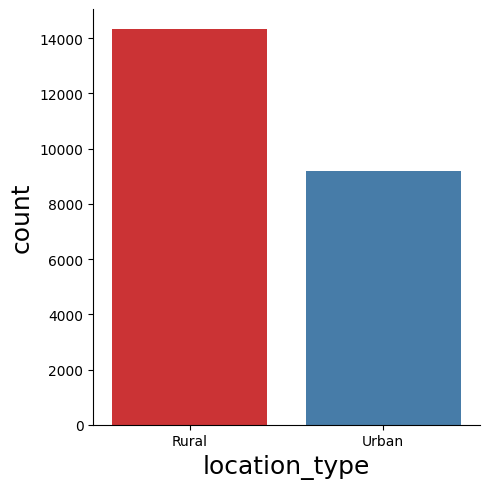

In [15]:
sns.catplot(x="location_type", kind="count", data=train, palette="Set1")

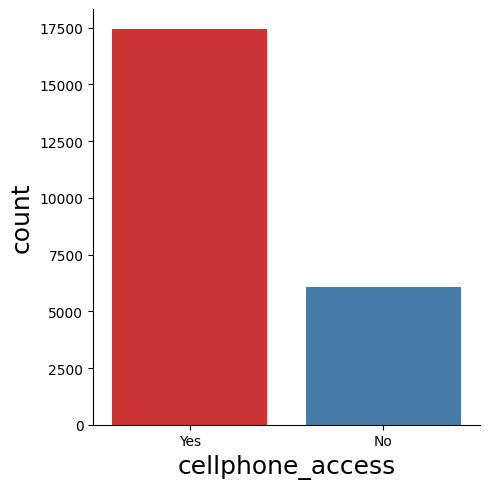

In [16]:
sns.catplot(x="cellphone_access", kind="count", data=train, palette="Set1")

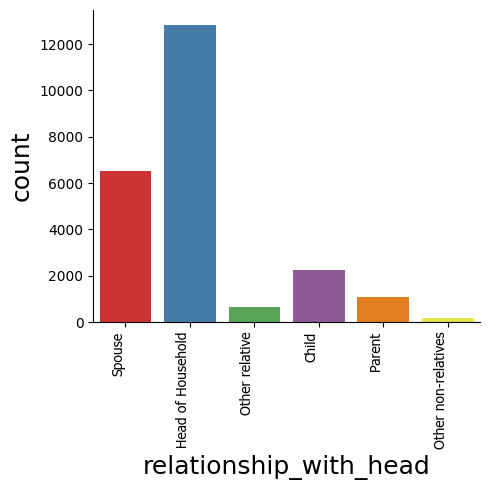

In [17]:
sns.catplot(x="relationship_with_head", kind="count", data=train, palette="Set1")
plt.xticks(
    rotation=90,
    horizontalalignment='right',
    fontstyle='italic',
    fontfamily='tahoma',
)
plt.tight_layout()

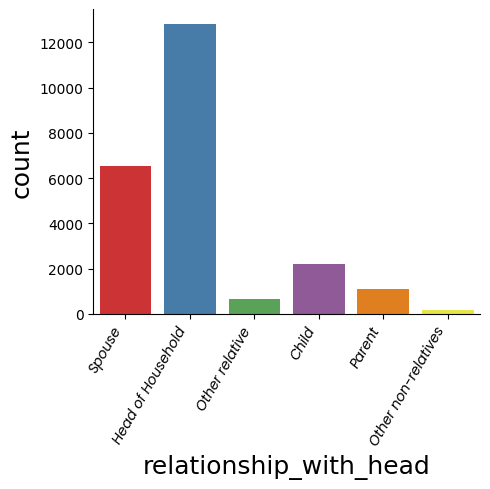

In [18]:
sns.catplot(x="relationship_with_head", kind="count", data=train, palette="Set1")
plt.xticks(
    rotation=60,
    horizontalalignment='right',
    fontstyle='italic',
    fontfamily='poppins',
)
plt.tight_layout()

Text(0.5, 0, 'Household size')

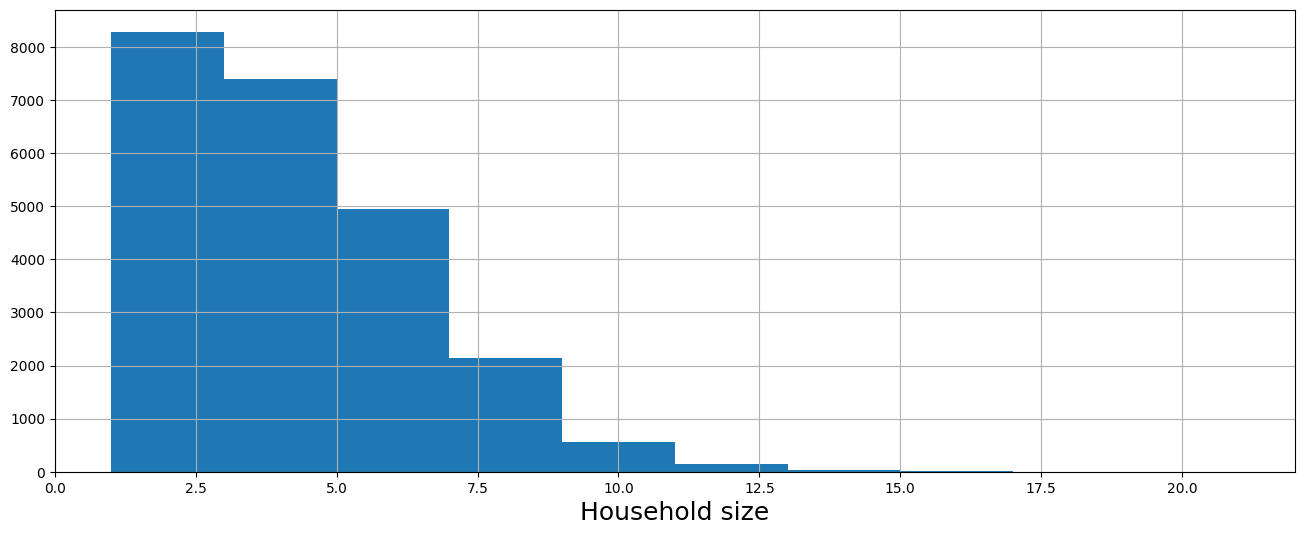

In [19]:
# explore house hold_size distribution
plt.figure(figsize=(16,6))
train.household_size.hist()
plt.xlabel('Household size')

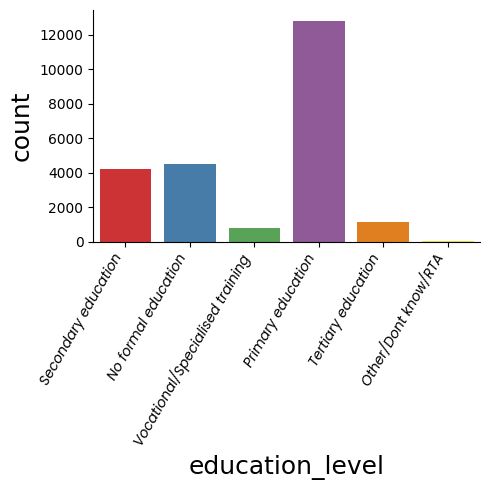

In [20]:
sns.catplot(x="education_level", kind="count", data=train, palette="Set1")
plt.xticks(
    rotation=60,
    horizontalalignment='right',
    fontstyle='italic',
    fontfamily='poppins',
)
plt.tight_layout()

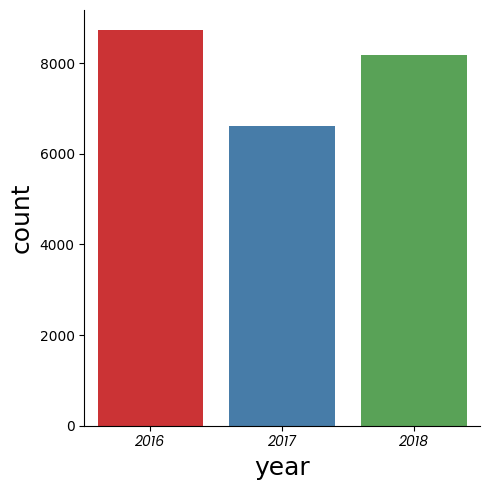

In [21]:
sns.catplot(x="year", kind="count", data=train, palette="Set1")
plt.xticks(

    fontstyle='italic',
    fontfamily='poppins',
)
plt.tight_layout()

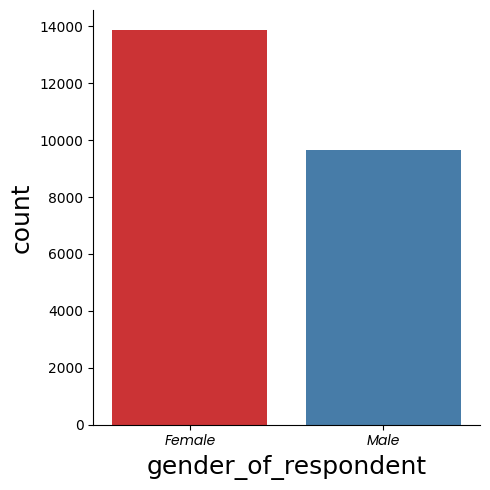

In [22]:
sns.catplot(x="gender_of_respondent", kind="count", data=train, palette="Set1")
plt.xticks(

 
    fontstyle='italic',
    fontfamily='poppins',
)
plt.tight_layout() 

([0, 1], [Text(0, 0, 'Rural'), Text(1, 0, 'Urban')])

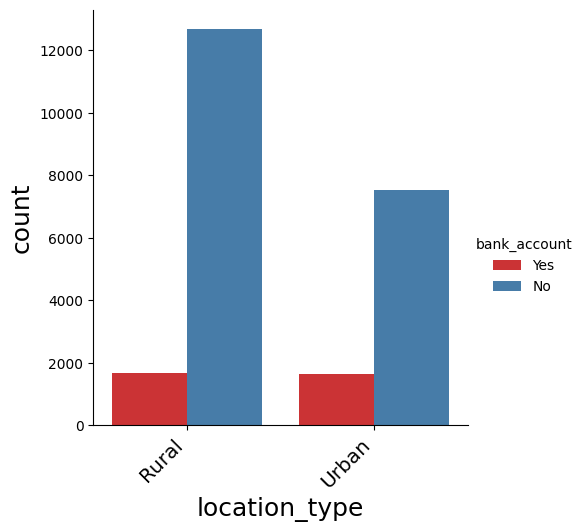

In [23]:
sns.catplot(x="location_type",hue="bank_account", kind="count", data = train, palette= "Set1" )
plt.xticks(
    rotation = 45,
    horizontalalignment = 'right',
    fontweight= 'light',
    fontsize= 'x-large'
)

([0, 1], [Text(0, 0, 'Female'), Text(1, 0, 'Male')])

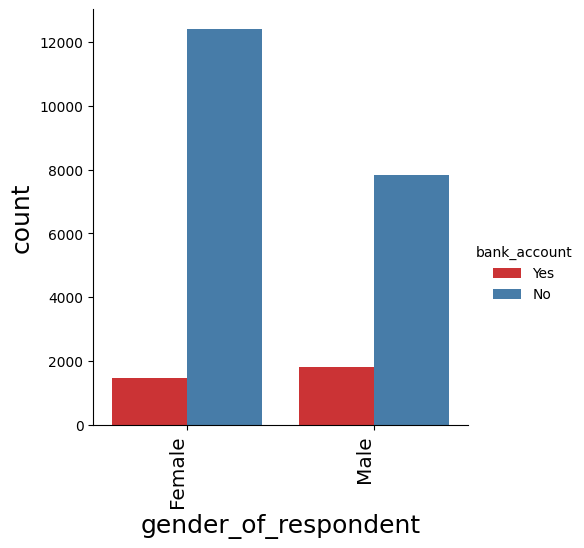

In [24]:
sns.catplot(x="gender_of_respondent",hue="bank_account", kind="count", data = train, palette= "Set1" )
plt.xticks(
    rotation = 90,
    horizontalalignment = 'right',
    fontweight= 'light',
    fontsize= 'x-large'
)

([0, 1], [Text(0, 0, 'Yes'), Text(1, 0, 'No')])

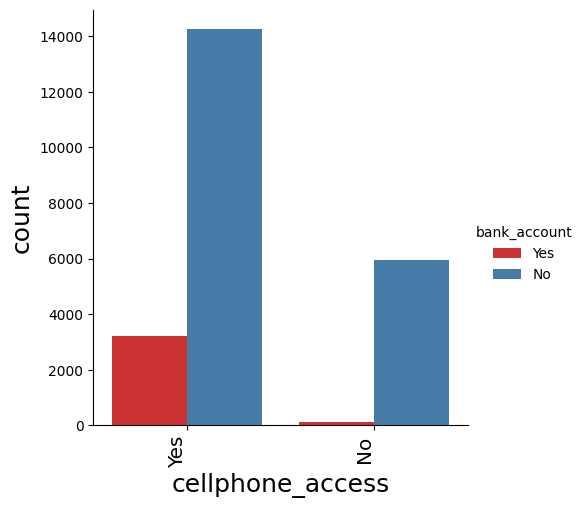

In [25]:
sns.catplot(x="cellphone_access",hue="bank_account", kind="count", data = train, palette= "Set1" )
plt.xticks(
    rotation = 90,
    horizontalalignment = 'right',
    fontweight= 'light',
    fontsize= 'x-large'
)

([0, 1], [Text(0, 0, 'Female'), Text(1, 0, 'Male')])

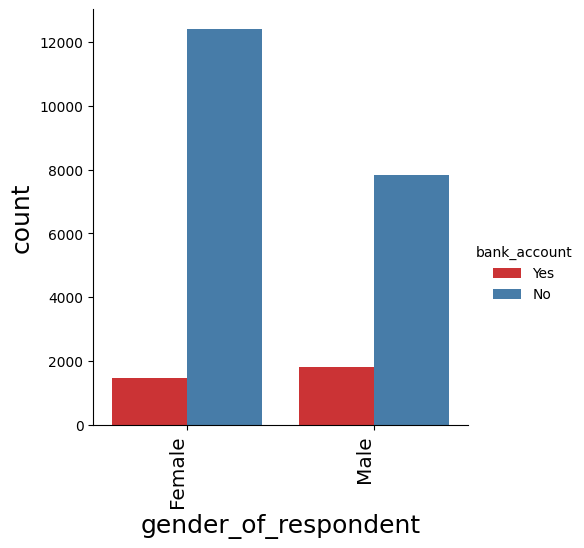

In [26]:
sns.catplot(x="gender_of_respondent",hue="bank_account", kind="count", data = train, palette= "Set1" )
plt.xticks(
    rotation = 90,
    horizontalalignment = 'right',
    fontweight= 'light',
    fontsize= 'x-large'
)

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Secondary education'),
  Text(1, 0, 'No formal education'),
  Text(2, 0, 'Vocational/Specialised training'),
  Text(3, 0, 'Primary education'),
  Text(4, 0, 'Tertiary education'),
  Text(5, 0, 'Other/Dont know/RTA')])

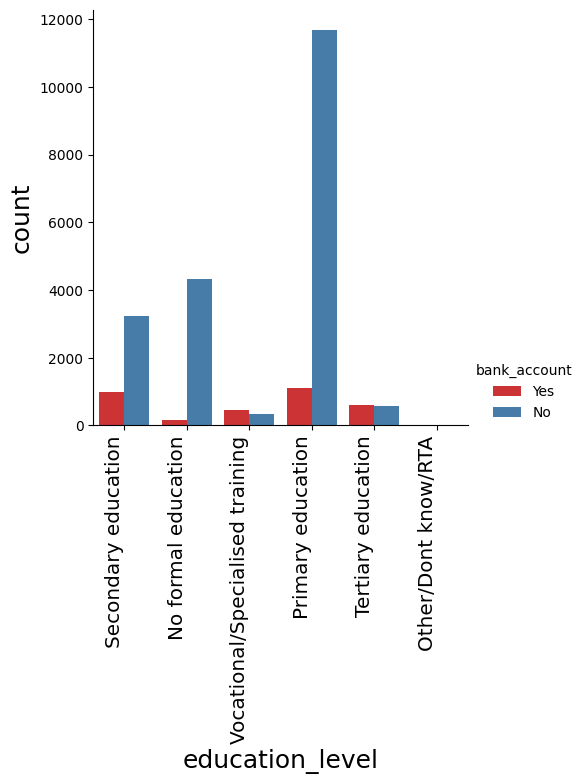

In [27]:
sns.catplot(x="education_level",hue="bank_account", kind="count", data = train, palette= "Set1" )
plt.xticks(
    rotation = 90,
    horizontalalignment = 'right',
    fontweight= 'light',
    fontsize= 'x-large'
)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Self employed'),
  Text(1, 0, 'Government Dependent'),
  Text(2, 0, 'Formally employed Private'),
  Text(3, 0, 'Informally employed'),
  Text(4, 0, 'Formally employed Government'),
  Text(5, 0, 'Farming and Fishing'),
  Text(6, 0, 'Remittance Dependent'),
  Text(7, 0, 'Other Income'),
  Text(8, 0, 'Dont Know/Refuse to answer'),
  Text(9, 0, 'No Income')])

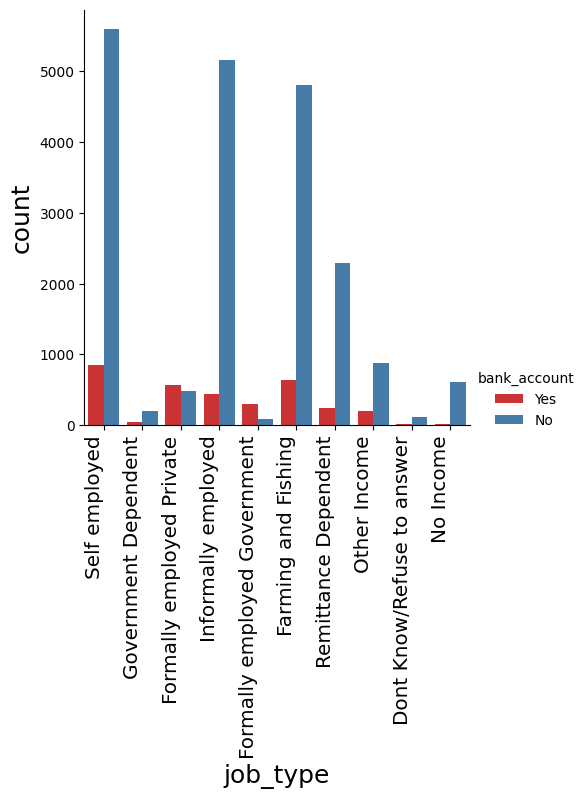

In [28]:
sns.catplot(x="job_type",hue="bank_account", kind="count", data = train, palette= "Set1" )
plt.xticks(
    rotation = 90,
    horizontalalignment = 'right',
    fontweight= 'light',
    fontsize= 'x-large'
)

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Spouse'),
  Text(1, 0, 'Head of Household'),
  Text(2, 0, 'Other relative'),
  Text(3, 0, 'Child'),
  Text(4, 0, 'Parent'),
  Text(5, 0, 'Other non-relatives')])

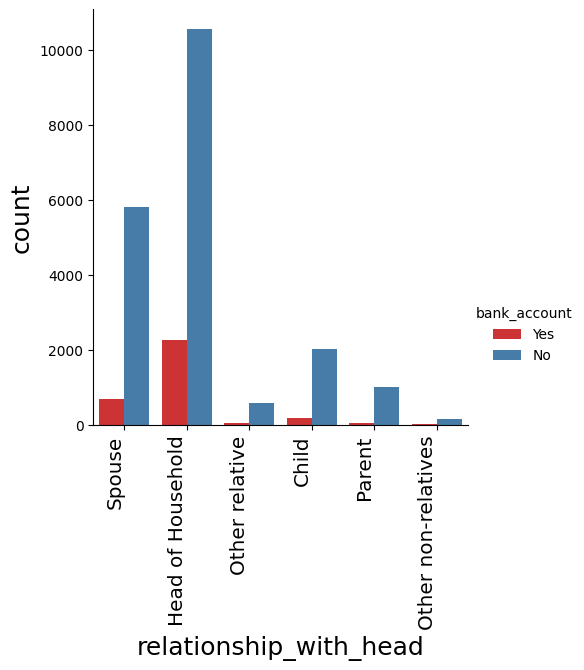

In [29]:

sns.catplot(x="relationship_with_head",hue="bank_account", kind="count", data = train, palette= "Set1" )
plt.xticks(
    rotation = 90,
    horizontalalignment = 'right',
    fontweight= 'light',
    fontsize= 'x-large'
)

In [30]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

# convert target label to numerical data
le=LabelEncoder()
train['bank_account']=le.fit_transform(train['bank_account'])


# separate training features from from target features
X_train = train.drop(['bank_account'], axis=1)
y_train = train['bank_account']

In [31]:
def preprocessing_data(data):
    #convert the following numerical labels from interger to float
    float_array = data[["household_size", "age_of_respondent", "year"]].value.astype(float)

    #categorical feature to be converted to one hot encoding
    categ = ["relationship_with_head", "maritial status", "education_level", "job_type", "country"]

    #one hot encoding conversion
    data = pd.get_dummies(data, prefix_sep="_", columns=categ)

    #label encorder conversion
    data ["location_type"] = le.fit_transform(data["location_type"])
    data ["cellphone_access"] = le.fit_transform(data["cellphone_access"])
    data ["gender_of_respondent"] = le.fit_transform(data["gender_of_respondent"])

    #drop uniquid column
    data = data.drop(["uniqueid"], axis=1)

    #scale our data into range of 0 and 1
    scaler = MinMaxScaler(feature_range=(0,1))
    data = scaler.fit_transform(data)

    return data

In [32]:
#process
processed_train = preprocessing_data(X_train)
processed_test = preprocessing_data(test)

AttributeError: 'DataFrame' object has no attribute 'value'

In [ ]:
import sklearn.model_selection

In [ ]:
#Split train data
from sklearn.model_selection import train_test_split

X_train, x_val, y_train, y_val = train_test_split(processed_train, y_train, stratify = y_train, test_size=28, random_state=42)

In [ ]:
#import classifier algorithm here
from xgboost import XGBClassifier

#create model
xg_model = XGBClassifier